In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing required libraries

import numpy as np
import pandas as pd
import tensorflow as tf
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/IBM Employee Attrition Prediction/IBM Attrition Data.csv')
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [ ]:
names = df.columns.values
print(names)

['Age' 'Attrition' 'Department' 'DistanceFromHome' 'Education'
 'EducationField' 'EnvironmentSatisfaction' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked' 'WorkLifeBalance'
 'YearsAtCompany']


# Data Visualization

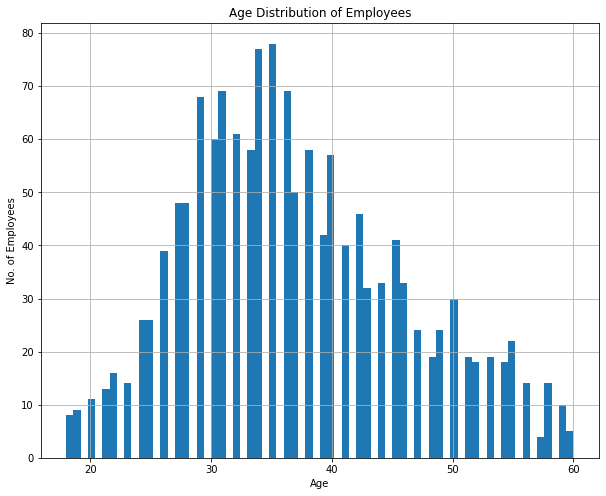

In [ ]:
#Histogram for Age

plt.figure(figsize=(10,8))
df['Age'].hist(bins=70)
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("No. of Employees")
plt.show()

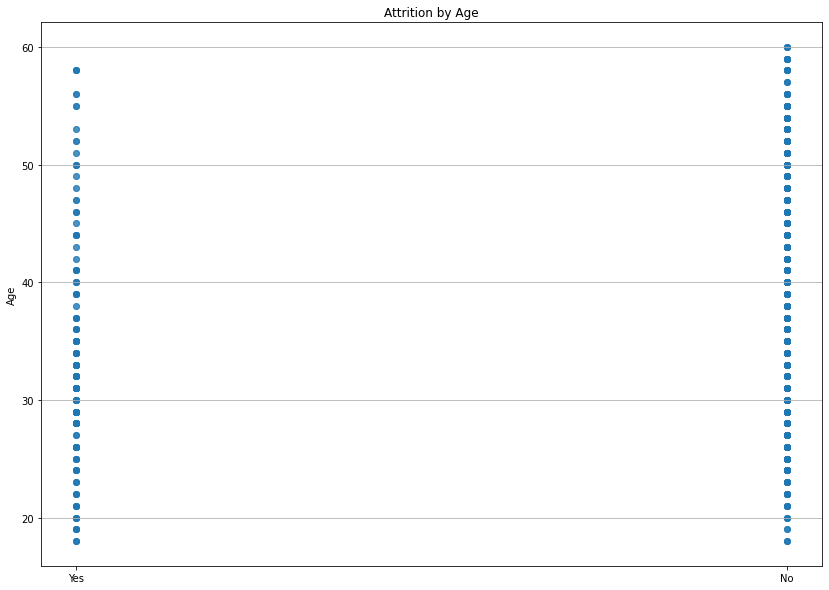

In [ ]:
#Explore data for Attrition by Age

plt.figure(figsize=(14,10))
plt.scatter(df.Attrition, df.Age, alpha=.55)
plt.title("Attrition by Age")
plt.ylabel("Age")
plt.grid(b=True, which = 'major', axis = 'y')
plt.show()

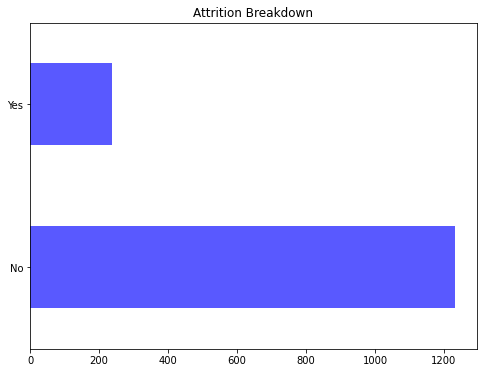

In [ ]:
#Explore Data for Left Employees Breakdown

plt.figure(figsize=(8,6))
df.Attrition.value_counts().plot(kind='barh', color='b', alpha = .65)
plt.title("Attrition Breakdown")
plt.show()

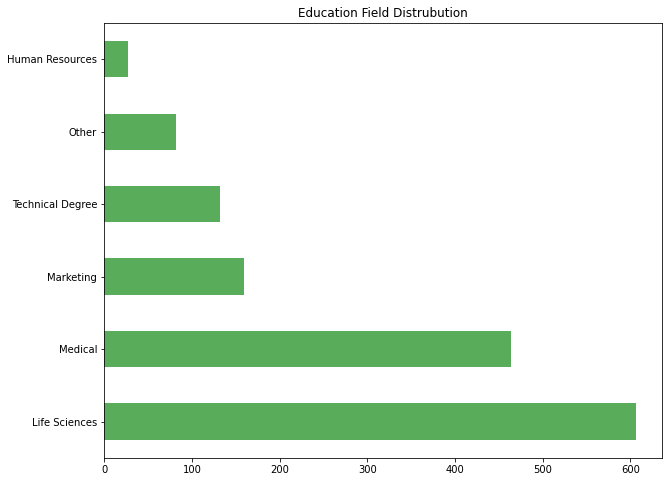

In [ ]:
#Explore Data for Education Field Distribution

plt.figure(figsize=(10,8))
df.EducationField.value_counts().plot(kind='barh', color='g', alpha=.65)
plt.title("Education Field Distrubution")
plt.show()

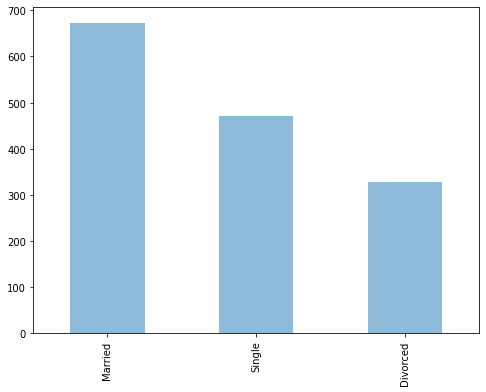

In [ ]:
#Explore Data for Marital Status

plt.figure(figsize=(8,6))
df.MaritalStatus.value_counts().plot(kind='bar', alpha=.5)
plt.show()

In [ ]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [ ]:
df.std()

<ipython-input-12-ce97bb7eaef8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Age                           9.135373
DistanceFromHome              8.106864
Education                     1.024165
EnvironmentSatisfaction       1.093082
JobSatisfaction               1.102846
MonthlyIncome              4707.956783
NumCompaniesWorked            2.498009
WorkLifeBalance               0.706476
YearsAtCompany                6.126525
dtype: float64

# Data Cleaning

In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
df['Attrition'].dtypes

dtype('O')

In [ ]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [ ]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [ ]:
df['EducationField'] = df['EducationField'].map({'Life Sciences':1, 'Medical':2, 'Marketing':3, 'Technical Degree':4, 'Other':5, 'Human Resources':6})
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,Sales,1,2,1,2,4,Single,5993,8,1,6
1,49,0,Research & Development,8,1,1,3,2,Married,5130,1,3,10
2,37,1,Research & Development,2,2,5,4,3,Single,2090,6,3,0
3,33,0,Research & Development,3,4,1,4,3,Married,2909,1,3,8
4,27,0,Research & Development,2,1,2,1,2,Married,3468,9,3,2


In [ ]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [ ]:
df['Department'] = df['Department'].map({'Research & Development':1, 'Sales':2, 'Human Resources':3})
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,Single,5993,8,1,6
1,49,0,1,8,1,1,3,2,Married,5130,1,3,10
2,37,1,1,2,2,5,4,3,Single,2090,6,3,0
3,33,0,1,3,4,1,4,3,Married,2909,1,3,8
4,27,0,1,2,1,2,1,2,Married,3468,9,3,2


In [ ]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [ ]:
df['MaritalStatus'] = df['MaritalStatus'].map({'Married':1, 'Single':2, 'Divorced':3})
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,1,2,2,5,4,3,2,2090,6,3,0
3,33,0,1,3,4,1,4,3,1,2909,1,3,8
4,27,0,1,2,1,2,1,2,1,3468,9,3,2


In [ ]:
df.dtypes

Age                        int64
Attrition                  int64
Department                 int64
DistanceFromHome           int64
Education                  int64
EducationField             int64
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int64
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
dtype: object

# Analyzing the Data

In [ ]:
y = df['Attrition']

In [ ]:
y, x = dmatrices('Attrition ~ Age + Department + DistanceFromHome + Education + EducationField + YearsAtCompany', df, return_type = 'dataframe')
y = np.ravel(y)

In [ ]:
model = LogisticRegression()
model.fit(x,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(x, y)

0.8408163265306122

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

model2 = LogisticRegression()
model2.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#Prediction
pred = model2.predict(x_test)

In [ ]:
print("Accuracy: ",accuracy_score(y_test, pred))

Accuracy:  0.8412698412698413


In [ ]:
#Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))

Confusion Matrix:
 [[371   0]
 [ 70   0]]


In [ ]:
#Classification Report
print("Classification Report:\n", classification_report(y_test, pred))

Classification REport:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       371
         1.0       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
